In [31]:
import numpy as np
import math
import matplotlib.pyplot as plt
import solver as solver             
from scipy.integrate import solve_ivp as solver_scipy

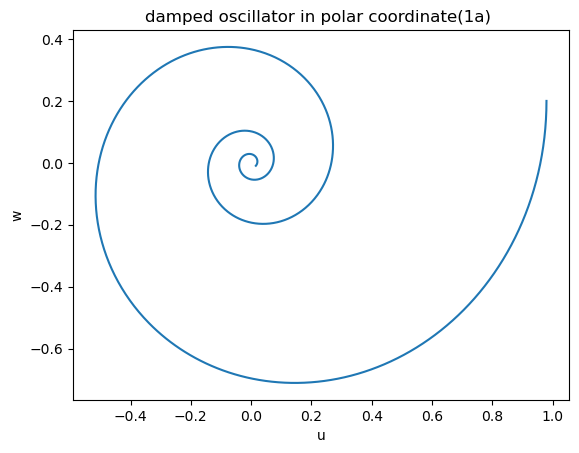

In [32]:
#第一大題a小題  
#重複利用demo3
# define the y' funciotn
def func_damped(t,y,K,M,L):
    force = -K * y[0] - L * y[1]     # F = - k v - L v
    f = np.zeros(len(y))
    f[0] = y[1]                      # y'[0] = v
    f[1] = force/M                   # y'[1] = a = F/M
    return f
# Prepare the input arguments
t_span = np.linspace(0,20, 2001)
t_eval = t_span
y = np.array([1,0]) # initial condition (A=1，phi=pi/2)
K = 1
M = 1 #omega=1rad/s
L = 0.4
args = (K,M,L)

# use the IVP solver
sol = solver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args)
u=math.sqrt(1-L**2/4)*sol[0] #u=omega_1*x
w=L/2*sol[0]+sol[1] #w=Lx+v
plt.plot(u, w)
plt.xlabel('u')
plt.ylabel('w')
plt.title('damped oscillator in polar coordinate(1a) ')
plt.show()

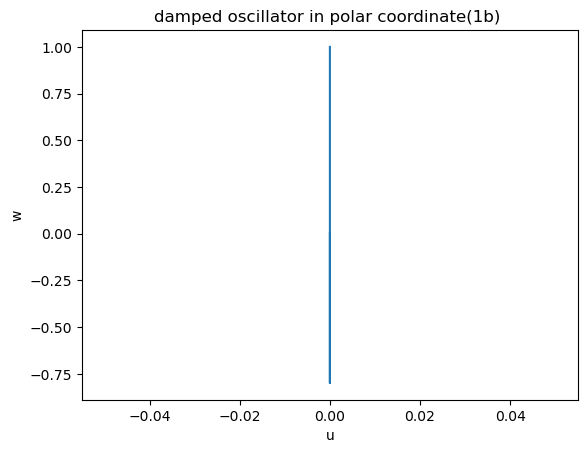

In [33]:
#第一大題b小題  
L=2 #改變L的數值
sol = solver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args)
u=math.sqrt(1-L**2/4)*sol[0] #u=omega_1*x
w=L/2*sol[0]+sol[1] #w=Lx+v
plt.plot(u, w)
plt.xlabel('u')
plt.ylabel('w')
plt.title('damped oscillator in polar coordinate(1b) ')
plt.show()

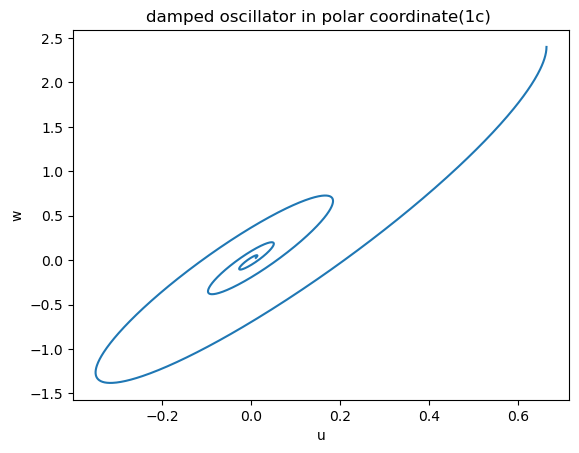

In [34]:
#第一大題c小題  
L=2.4 #改變L的數值
sol = solver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args)
u=math.sqrt(L**2/4-1)*sol[0] #u=omega_1*x overdamp 
w=L*sol[0]+sol[1] #w=Lx+v
plt.plot(u, w)
plt.xlabel('u')
plt.ylabel('w')
plt.title('damped oscillator in polar coordinate(1c) ')
plt.show()

In [35]:
#第二題
L=0.4 #改變L的數值
sol = solver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args)